In [ ]:
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
import matplotlib.pyplot as plt

# tau*dydt = -y + k*u  solve this for stepchange in u (step input at certain time)

def firstorder(y,t):
    tau = 5.0
    k = 2.0
    u = 1.0
    dydt = (-y + k*u)/tau
    return dydt

t = np.linspace(0,10,11)

y = odeint(firstorder,0, t)
print(y)

plt.plot(t,y)


In [ ]:
# now we want to have that u value change at different times 
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
import matplotlib.pyplot as plt

# tau*dydt = -y + k*u  solve this for stepchange in u (step input at certain time)

# lets say we want to have diff k and u
# dann definen wir sie nicht hier sondern beforehand
def firstorder(y,t, k, u):
    tau = 5.0
    #k = 2.0
    #u = 1.0
    dydt = (-y + k*u)/tau
    return dydt

t = np.linspace(0,10,11)
k = 2.0

#write them don here and feed those in as its integrating
# lets change the value of u at every timepoint
# u zeros same length as time
u = np.zeros(len(t))
u[3:8] = 1.0
print(u)


y = odeint(firstorder,0, t, args = (k,u)) # added in as arguments
#print(y)

#plt.plot(t, y)


In [ ]:
# now we want to have that u value change at different times 
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
import matplotlib.pyplot as plt

# tau*dydt = -y + k*u  solve this for stepchange in u (step input at certain time)

# lets say we want to have diff k and u
# dann definen wir sie nicht hier sondern beforehand
def firstorder(y,t, k, u):
    tau = 5.0
    #k = 2.0
    #u = 1.0
    dydt = (-y + k*u)/tau
    return dydt

t = np.linspace(0,10,11)
k = 2.0

#write them don here and feed those in as its integrating
# lets change the value of u at every timepoint 
# change u at different time sin that horizon?? 
# u zeros same length as time
u = np.zeros(len(t))
u[3:8] = 1.0
y0 = 0

# we have different u values now and we want to have those input at different times in the horizon
# create for loop for i in range of t
# that was 11 , we need to minus 1 because we only going 10 steps
# and then we want to integrate this for the first timestep
# and thats gonna be not all of those t values 
#but thats only gonna be between ti to ti+1 -created lil vector

for i in range(len(t)-1):
    ts = [t[i], t[i+1]]
# erst fehler weil man vector because i put a vector in here
#args=(k,u) and it returned a vector of dydt
# we need to put in u[i] so its gonna use the value of u, oben ham 
#oben ham wir nähmlich bei u = npzeros in vector instea dof scalar gewandelt
#deshalb darf man nur ein vlaue hier reinmachen
# und deshalb hat e snur bei args=(k,u) gehangen
# die message kam weil es sagte the size of the array retruned by f
# does not match the size of y0 weils nur ne single numbe ris 
# aber es war returning 11 numbers and the dydt weil man ohne 
# ohne u[i] ein u reingepasst hat was 11 lang war
# dadruch wurde dydt auch 11 long und returned 11 
# aber wow wir ham nur 1 state
    y = odeint(firstorder,y0, ts, args = (k,u[i])) # added in as arguments
    y0 = y[1]
    #y0 initial cond y[1] final cond and then it feed back in
    #afte rit integrates new initial condition is y1
    # the next time it goes in loop it feed in the new initial condition and recalculate that
    #print(y) when it solves that
    print(y[1])

#plt.plot(t, y)

plt.plot(t,y)


[0.         0.         0.         0.         0.36253849 0.65935989
 0.90237668 1.101342   1.26424102 1.39761146 1.50680593]


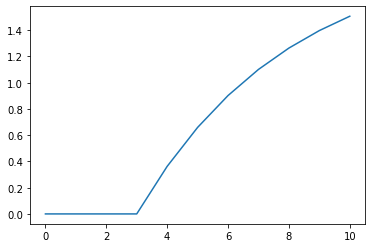

In [4]:
# now we want to have that u value change at different times 
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
import matplotlib.pyplot as plt

# tau*dydt = -y + k*u  solve this for stepchange in u (step input at certain time)

# lets say we want to have diff k and u
# dann definen wir sie nicht hier sondern beforehand
def firstorder(y,t, k, u):
    tau = 5.0
    #k = 2.0
    #u = 1.0
    dydt = (-y + k*u)/tau
    return dydt

t = np.linspace(0,10,11)
k = 2.0


u = np.zeros(len(t))
#u[3:8] = 1.0
u[3:] = 1.0
y0 = 0

# we need to store these numbers, to do that we do ys = np.zeros
# with same length as t
# very first one initial condition
# very first element is going to be equal to Y0

ys = np.zeros(len(t)) # des erste mal gehts nur ums definen
ys[0] = y0 # kann man des weglassen?

# and then we will store this each time we go through zZz


for i in range(len(t)-1):   # index 11 is out of bounds for axis 0 with size 11 ohne -1
    ts = [t[i], t[i+1]]

    y = odeint(firstorder,y0, ts, args = (k,u[i])) # added in as arguments
    y0 = y[1]
    #zZz will be i+1 going to be the next one in that list going to be y0
    
    ys[i+1] = y0
    #print(y[1])
    



plt.plot(t,ys)

print(ys)


[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [8.80546920e-09]
 [3.62538500e-01]
 [6.59359914e-01]
 [9.02376737e-01]
 [1.10134208e+00]
 [1.26424113e+00]
 [1.39761160e+00]
 [1.50680610e+00]]


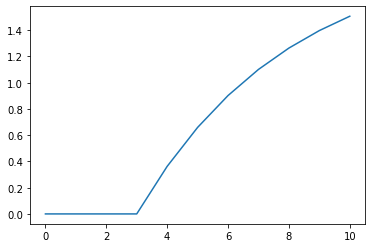

In [1]:
# Avoided the loop by passing u as a function representing the step function:
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
import matplotlib.pyplot as plt
def first_order(y, t, tau, K, u):
    dydt = (-y + K*u(t)) / tau
    return dydt


t0 = 0
t1 = 10
intervals = 11
t = np.linspace(t0, t1, intervals)
tau = 5.0
K = 2.0
#x = lambda a: a + 17-print(x(5))- 22. weil 17+5 is 22
#https://www.w3schools.com/python/python_lambda.asp
#lambda arguments : expression, expression is executed and result is returned
u = lambda t: 0 if t < 3 else 1

y = odeint(first_order, 0, t, args=(tau, K, u))
plt.plot(t, y)

print(y)

[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [8.80546920e-09]
 [3.62538500e-01]
 [6.59359914e-01]
 [9.02376737e-01]
 [1.10134208e+00]
 [1.26424113e+00]
 [1.39761160e+00]
 [1.50680610e+00]]


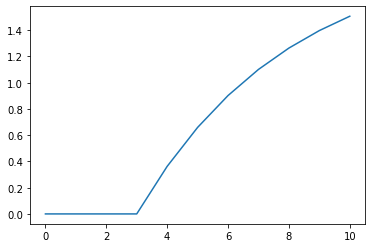

In [5]:
#self
# Avoided the loop by passing u as a function representing the step function:
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
import matplotlib.pyplot as plt

t = np.linspace(t0, t1, intervals)
def first_order(y, t, tau, K):
    
    if t < 3:
        u = 0.0
    else:
        u = 1.0
    
    dydt = (-y + K*u )/ tau
    return dydt


t0 = 0
t1 = 10
intervals = 11
t = np.linspace(t0, t1, intervals)
tau = 5.0
K = 2.0
#x = lambda a: a + 17-print(x(5))- 22. weil 17+5 is 22
#https://www.w3schools.com/python/python_lambda.asp
#lambda arguments : expression, expression is executed and result is returned
u = lambda t: 0 if t < 3 else 1

y = odeint(first_order, 0, t, args=(tau, K))
plt.plot(t, y)

print(y)